# Random number generation and statistics

In this unit we demonstrate how you can generate random numbers for various
probability distributions in NumPy. Additionally, we take a look
at SciPy's `stats` package which implements PDFs and other functions
for numerous probability distributions.

## Random number generators

Currently, there are sevaral ways to draw random numbers:

1.  The *new* programming interface implemented in NumPy, introduced
    in version 1.17 (the current version as of this writing
    is 1.19)
    [[official documentation](https://numpy.org/doc/stable/reference/random/generator.html)].
2.  The *legacy* programming interface implemented in NumPy
    [[official documentation](https://numpy.org/doc/stable/reference/random/legacy.html)].

    While these functions have been superceeded by the new implementation,
    they continue to work.
    If you are familiar with the legacy interface, you can read about
    what has changed in the new interface [here](https://numpy.org/doc/stable/reference/random/new-or-different.html).
3.  The Python standard library itself also contains random number generators
    in the `random` module [[official documentation](https://docs.python.org/dev/library/random.html#random.random)].

    We will not be using this implementation at all,
    since for our purposes `numpy.random` is preferable
    as it supports NumPy arrays.

The programming interface for generating random numbers in NumPy
changed substantially in release 1.17.
We will discuss the new interface in this unit since it offers
several advantages, including faster algorithms for some distributions.
Moreover, one would expect the legacy interface to be
removed at some point in the future.
However, most examples you will find in textbooks and on the internet
will be using the old variant.

**A note on random-number generation:** computers usually cannot draw
truly random numbers, so we often talk about pseudo-random number
generators (PRNG). Given an initial seed, these PRNGs will always produce
the same sequence of "random" numbers, at least if run on the
same machine, using the same underlying algorith, etc.
For scientific purposes this is actually desirable as it allows is
to create reproducible results. For simplicitly, we will nevertheless
be using the terms "random number" and "random number generator" (RNG).


### Simple random data

Let's begin with the most simple use-case, which uses the `random()`
function to draw numbers that are uniformly distributed
on the half-open interval $[0.0, 1.0)$.

In [1]:
from numpy.random import default_rng
rng = default_rng()         # obtain default RNG implementation
x = rng.random(10)          # return array of 10 random numbers
x

array([0.00693551, 0.04256752, 0.54192133, 0.25456363, 0.26794512,
       0.59222021, 0.82105294, 0.7841106 , 0.25498818, 0.05459598])

Calling `random()` this way will usually return a different set of
numbers each time (this might, for example, depend on the system time).
To obtain the same draw each time, we can pass an initial *seed* when
creating an instance of the RNG like this:

In [2]:
seed = 123
rng = default_rng(seed)     # obtain default RNG implementation, initialise seed
x = rng.random(5)           # return array of 10 random numbers

The `seed` argument needs to be an integer, or an array of integers.
This way, each call gives you the same numbers, as can easily be illustrated
with a loop:

In [3]:
seed = 123
for i in range(5):
    rng = default_rng(seed)
    print(rng.random(5))

[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]


You can remove the `seed` to verify that the set of number will differ
in each iteration otherwise.

Alternatively, we might want to draw random intergers by calling
`integers()`, which returns numbers from a "discrete uniform"
distribution on the given interval [[docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html)]:

In [4]:
rng.integers(2, size=5)             # vector with 5 integers from {0, 1}

array([0, 1, 0, 1, 0])

In [5]:
rng.integers(1, 10, size=5)     # specify lower and upper bound

array([3, 8, 8, 8, 9])

In [6]:
rng.integers(1, 10, size=5, endpoint=True)      # include upper bound

array([1, 6, 3, 3, 3])

We can create higher-order arrays by passing a list or tuple as the
`size` argument:

In [7]:
rng.random(size=[2, 5])             # Create 2x5 array of floats on [0.0, 1.0)

array([[0.21376296, 0.74146705, 0.6299402 , 0.92740726, 0.23190819],
       [0.79912513, 0.51816504, 0.23155562, 0.16590399, 0.49778897]])

In [8]:
rng.integers(2, size=[2,3,4])       # Create 2x3x4 array of integers {0,1}


array([[[1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0]],

       [[1, 0, 1, 1],
        [1, 1, 1, 0],
        [0, 0, 1, 0]]])

#### Legacy interface
For completeness, let's look how you would accomplish the same using
the *legacy* NumPy interface:

In [9]:
from numpy.random import random_sample, randint, seed
seed(123)
random_sample(5)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

In [10]:
randint(2, size=5)      # draw random integers from {0,1 }

array([1, 1, 0, 1, 0])

As you see, th legacy interface defines global functions `seed`, `random_sample`, etc.
within the `numpy.random` module, which are implicitly associated with
a global RNG object. This implicit association has been removed in the
new programming model and you now have to obtain an RNG instance explicitly,
for example by using the `default_rng()` function, as demonstrated above.


### Drawing random numbers from distributions

Often we want to draw random numbers from a specific distribution,
just as normal or log-normal distributions. The RNGs in `numpy.random`
support a multitide of distributions, including:

-   `binomial()`
-   `exponential()`
-   `normal()`
-   `lognormal()`
-   `multivariate_normal()`
-   `uniform()`

and many others. For a complete list, see the [official documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

We will illustrate the use of these functions for the normal and
multivariate normal distributions. For example, you can draw
from the normal distribution with mean $\mu=1.0$ and standard deviation
$\sigma=0.5$ as follows:

Text(0.5, 1.0, 'Historgram of normal draws')

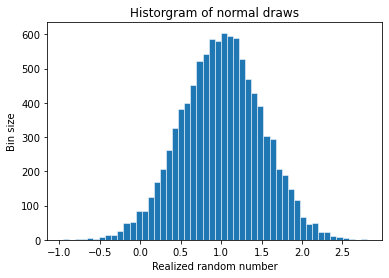

In [11]:
from numpy.random import default_rng
rng = default_rng(123)

mu = 1.0
sigma = 0.5
# Draw 10000 normal numbers
x = rng.normal(loc=mu, scale=sigma, size=10000)    # mean and std. are passed as
                                                   # loc and scale arguments

# plot the results
import matplotlib.pyplot as plt
plt.hist(x, bins=50, linewidth=0.5, edgecolor='white')
plt.xlabel(r'Realized random number')
plt.ylabel('Bin size')
plt.title('Historgram of normal draws')

To draw from the multivariate normal, we need to specify a vector
of means and the variance-covariance matrix, which we set to

$$\mu = \left[\begin{array}{c} 0 \\ 1\end{array}\right], \qquad \Sigma=\left[\begin{array}{cc}\sigma_1^2 & \rho \sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2\end{array}\right]$$

with $\sigma_1 = 0.5$, $\sigma_2 = 1.0$ and $\rho = 0.5$.

Text(0.5, 1.0, 'Draws from bivariate normal distribution')

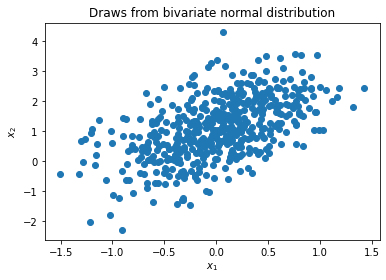

In [12]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng(123)

mu = np.array((0.0, 1.0))       # vector of means
sigma1 = 0.5
sigma2 = 1.0
rho = 0.5
# Create variance-covariance matrix
vcv = np.array([[sigma1**2.0, rho*sigma1*sigma2],
                [rho*sigma1*sigma2, sigma2**2.0]])

# Draw MVN random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=500)

# Scatter plot of sample
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Draws from bivariate normal distribution')

***
## More functions for probability distributions

NumPy itself only implements distribution-specific RNGs. Frequently, we want
to evaluate probability density functions (PDFs), cumulative distribution
functions (CDFs) or compute some moments such as the mean of a random
variable following some distribution. The SciPy project implements
these functions for a wide range of discrete and continuous univariate
distributions as well as for a few multivariate ones
in the `scipy.stats` package.

The most useful functions include:

-   `pdf()`: probability density function
-   `cdf()`: cumulative distribution function
-   `ppf()`: percent point function (inverse of `cdf`)
-   `moment()`: non-central moment of some order $n$
-   `expect()`: expected value of a function (of one argument) with
    respect to the distribution

The parameters that need to be passed to these functions are distribution
dependent. See the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
for details.

*Examples:*

We can overlay the histogram of normal draws with the actual normal
PDF as follows:

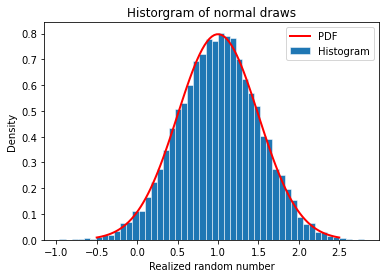

In [16]:
from numpy.random import default_rng
from scipy.stats import norm                # import normal distribution
import matplotlib.pyplot as plt
rng = default_rng(123)

mu = 1.0
sigma = 0.5
# Draw 10000 normal numbers
x = rng.normal(loc=mu, scale=sigma, size=10000)    # mean and std. are passed as
                                                   # loc and scale arguments

# plot histogram
plt.hist(x, bins=50, density=True, linewidth=0.5, edgecolor='white',
         label='Histogram')
# Create x-values for PDF plot, using mean +/- 3 std.
xvalues = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# Compute PDF of normal distr. at given x-values
pdf = norm.pdf(xvalues, loc=mu, scale=sigma)
# Plot PDF
plt.plot(xvalues, pdf, linewidth=2.0, color='red', zorder=10,
         label='PDF')
plt.xlabel(r'Realized random number')
plt.ylabel('Density')
plt.title('Historgram of normal draws')
plt.legend()

In the above example we pass `density=True` to Matplotlib's
`hist()` plotting function so that the result is rescaled to
be comparable to the actual PDF.

Sometime we want to compute the expectation of a function $g(x)$
with respect to a given distribution with PDF $f(x)$ on some
interval $(a,b)$:

$$E[g(x)] = \int_a^b g(x) f(x) dx$$

For example, we might want to know the mean of a *truncated* normal
with parameters $\mu=0$, $\sigma=1.0$ with support on $(-\infty,0)$,
ie.

$$E[x| x \leq 0] = \int_{-\infty}^0 x \frac{f(x)}{F(0)}dx$$

where $f(x)$ and $F(x)$ are the PDF and CDF of the standard normal.
We can compute it as follows:

In [19]:
from scipy.stats import norm
import numpy as np

lb = -np.inf            # integration lower bound
ub = 0.0                # integration upper bound

mu = 0.0                # mean of the (untruncated) normal
sigma = 1.0             # std. dev. of the (untruncated) normal
cdf0 = norm.cdf(0.0, loc=mu, scale=sigma)       # CDF at 0

# Compute conditional expected value
Ex = norm.expect(lambda x: x/cdf0, loc=mu, scale=sigma, lb=lb, ub=ub)
Ex                      # print conditional expectation

-0.7978845608028651

There we define the function to be integrated as $g(x) = \frac{x}{F(0)}$,
and we pass it to `expect()` as a lambda expression.


***
## Statistics functions

In the previous section we examined functions associated with specific
distributions. Additionally, there are numerous routines to process
*sample* data which are spread across NumPy in SciPy.

In NumPy, the most useful routines include:

-   `mean()`: sample mean
-   `std()`, `var()`: sample standard deviation and variance
-   `percentile()`, `quantile()`: percentiles or quantiles
    of a given array
-   `corrcoef()`: Pearson correlation coefficient
-   `cov()`: sample variance-covariance matrix
-   `histogram()`: compute histogram of data. This only bins the data,
    as opposed to Matplotlib's `hist()` which plots it.

You can find the full list of routines in the [official documentation](https://numpy.org/doc/stable/reference/routines.statistics.html).

On top of that, the `scipy.stats` package contains a multitude
of functions to compute all sorts of descriptive
statistics and statistical hypothesis tests. Many of these routines
are too specific to be listed here, so have a look at
the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)
if you need to perform statistical analysis of your sample data.

*Examples:*

To compute the pairwise correlations of a sample drawn from a multivariate
normal distribution we proceed as follows:

In [28]:
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# vector of multivariate normal means
mu = np.array([-1.0, 1.0])

sigma1 = 0.1
sigma2 = 2.0
rho = -0.5
# variance-covariance matrix
vcv = np.array([[sigma1**2.0, rho*sigma1*sigma2],
                [rho*sigma1*sigma2, sigma2**2.0]])

# Draw some multivariate normal random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=1000)

# Compute correlation coefficient
np.corrcoef(x.T)        # expects each row to contain one variable

array([[ 1.        , -0.47812682],
       [-0.47812682,  1.        ]])



In the next example we demonstrate how to compute some descriptive
statistics for a sample drawn from a multivariate normal distribution:

In [25]:
import scipy.stats
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# vector of multivariate normal means
mu = np.array([-1.0, 0.0, 1.0])

# variance-covariance matrix
vcv = np.array([[1.0, 0.5, 0.2],
                [0.5, 2.0, 0.7],
                [0.2, 0.7, 0.5]])

# Draw some multivariate normal random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=100)

# Compute some descriptive statistics
nobs, minmax, mean, variance, skewness, kurtosis = scipy.stats.describe(x)
mean        # array of means

array([-0.98486214, -0.0719401 ,  0.99084898])

In [26]:
variance    # array of variances

array([0.80017787, 1.96834418, 0.37118602])

To illustrate how to use on of the many tests implemented
in `scipy.stats`, we compute the [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)
statistic using `jarque_bera()`. This is a goodness-of-fit test
to assess whether a sample has zero skewness and excess kurtosis,
and could thus be normally distributed.

In [34]:
from scipy.stats import jarque_bera
from numpy.random import default_rng

rng = default_rng(123)

# Draw from univariate normal
x = rng.normal(loc=1.0, scale=2.0, size=10000)

# Compute Jarque-Bera test statistic
jb_stat, pvalue = jarque_bera(x)
print(f'Test statistic: {jb_stat:.3f}, p-value: {pvalue:.3f}')

Test statistic: 3.472, p-value: 0.176


With a p-value of about 0.17 we cannot reject the null hypothesis
of zero skewness and zero excess kurtosis.

***

# Exercises


***
# Solutions